In [137]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt
from tools import *
from sklearn.decomposition import PCA
import plotly.express as px

In [8]:
reg = LR()


In [10]:
# Features
# Span, Chord, Sweep, Tip (x2); weight, altitude, stability. 
# Interactions: later.

In [96]:
def getObs(n):
    obs = {}
    for i in range(n):
        try:
            df = pd.read_csv(f'rocket-results/{i}.csv')
        except:
            print('Missing', i)
        obs[i] = df
    return obs

In [78]:
tot = 0
count = 0
for i in range(400):
    try:
        df = pd.read_csv(f'rocket-results/{i}.csv')
    except:
        continue
    if 90 > df.max()['Time (sec)'] > 20:
        print(i)

In [75]:
df.max()['Altitude (ft)']

18493.71

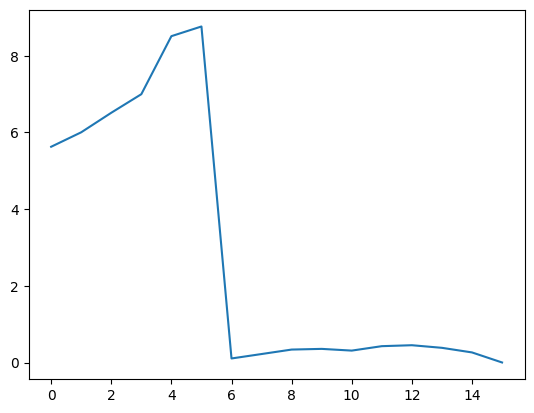

In [76]:
plt.plot(df['Time (sec)'], df['Stability Margin (cal)'])

In [79]:
# use time to classify stability

In [94]:
def initializeConfig():
    configs = {}
    with open('sample_list.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_100.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_200.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_300.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    return configs

In [100]:
config = initializeConfig()
obs = getObs(400)

In [194]:
data = {}
for i in range(len(config)):
    data[i] = list(config[i]['S'].values()) + list(config[i]['B'].values())
    data[i].append(obs[i].max()['Altitude (ft)'])
    data[i].append(obs[i].max()['Stability Margin (cal)'])

In [195]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.rename(columns={0: "Schord", 1: "Sspan", 2: "Ssweep", 3: "Stip", 4: "Bchord", 5: "Bspan", 6: "Bsweep", 7: "Btip", 8: "Altitude", 9: "Stability"})

In [196]:
features = ['Schord', 'Sspan', 'Ssweep', 'Stip', 'Bchord', 'Bspan', 'Bsweep', 'Btip']#, 'Stability']

In [197]:
pca = PCA()
components = pca.fit_transform(df[features])

In [198]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [199]:
labels

{'0': 'PC 1 (46.3%)',
 '1': 'PC 2 (9.3%)',
 '2': 'PC 3 (8.5%)',
 '3': 'PC 4 (7.8%)',
 '4': 'PC 5 (7.3%)',
 '5': 'PC 6 (7.1%)',
 '6': 'PC 7 (6.8%)',
 '7': 'PC 8 (6.1%)',
 '8': 'PC 9 (0.7%)'}

In [201]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions = range(2),
    color=df['Stability']
)
fig.update_traces(diagonal_visible=False)
fig.show()

/Users/alanyu/opt/miniconda3/envs/rocket/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [202]:
config

{0: {'S': {'Chord': 9.465232623567857,
   'Span': 9.191411087456556,
   'SweepDistance': 6.313146341736696,
   'TipChord': 6.181568139405},
  'B': {'Chord': 4.2532186078635155,
   'Span': 3.3627664522675493,
   'SweepDistance': 2.0042503349788507,
   'TipChord': 3.767645277160544}},
 1: {'S': {'Chord': 5.050902650814248,
   'Span': 2.8076646614502794,
   'SweepDistance': 7.250966464578223,
   'TipChord': 4.202998247364322},
  'B': {'Chord': 7.871765300083105,
   'Span': 6.329711285171727,
   'SweepDistance': 3.563605655723684,
   'TipChord': 6.148326272628201}},
 2: {'S': {'Chord': 8.796076434461629,
   'Span': 5.131824431733766,
   'SweepDistance': 8.46903992713077,
   'TipChord': 8.168440593186933},
  'B': {'Chord': 6.2261390568252075,
   'Span': 7.792487428371699,
   'SweepDistance': 6.816335372774216,
   'TipChord': 8.79534180619764}},
 3: {'S': {'Chord': 5.590219445479866,
   'Span': 9.233071570623206,
   'SweepDistance': 6.3526054560409895,
   'TipChord': 8.42960215206832},
  'B'